# Chapter 10.3: Analysis of Periodoic Time Series

## The Lomb-Scargle Method
Given a time series set of data {t,y}, find the period of variability which best folds the light curve.

Why are stars variable?

A simpler, stripped-down explanation goes something like this:

    When a Cepheid is compressed, it becomes opaque.
    Photons are trapped inside, heating the gas and increasing its pressure.
    The high-pressure gas expands, becoming transparent.
    Photons escape, the gas cools, the pressure drops.
    As the pressure drops, the Cepheid is compressed by gravity. 

This cycle repeats as long as the Cepheid (or the RR Lyrae, which pulsates by the same mechanism) is in the instability strip, the region of the H-R diagram where stars are unstable to pulsation. 

## Our goal is to go from this

Raw observations:

<img src="LSSTraw.png" style="width: 200px;">

## To this

Folded light curve:

<img src="LSSTfolded.png" style="width: 200px;">  

### (Proposed) Steps for classification of periodic stars
1. Using the Lomb-Scargle method (or others), find the period of variable stars which best folds the observed data
2. If necessary, perform interpolation to turn the folded light curve into a vector of constant length
3. Perform dimensional reduction prior to classification. Popular methods include PCA and Fourier decomposition.
4. Find the feature vectors in this reduced-dimension color space which best separate the classes, then choose a classifier.
    
<img src="variables.png" style="width: 300px;">

### Drawbacks:
- The Lomb-Scargle method is very time comsuming, at least when you're returning millions of classification targets in an all-sky survey like LSST
- In order to bring the time down to a reasonable number you need to know something about the period you're searching for already. But that's the whole point of classification.
- The problem is even worse for surveys which include quasi-periodic and stochastic sources. A relatively recent survey of period-finding methods found that, "even the best 10-20% have only a 10-20% success rate" (Graham 2013)
- A recent kaggle competition revealed that variable stars can easily be classified without knowing their period. In fact, the only star types which cannot be distinguished from metadata alone are the various types of supernovae. The winner of the competition was a PhD candidate in supernovae and used a Gaussian process to fit their light curves & provide the necessary feature vector for classifying them.

### (In reality) steps for classification of variable stars:
- In other words, if your catalog contains periodic, quasi-periodic, and stochaistic sources you wish to classify it turns out that you would probably perform classification on variable sources from a survey like LSST and THEN go back and search for their period using what you know about the star's variability type.
- The training set of spectroscopically confirmed objects is heavily biased toward bright, low-redshift objects. This must be accounted for from the beginning.
- So, the actual solution to the problem winds up being very different than what you might think!



<img src="popscivariable.png">

The variables here (from left to right, top to bottom) are a Mira, an eclipsing binary and "RR Lyrae" of type AB and an RR Lyrae of type C. Eclipsing binaries are still called Algol-type stars some times, but note that they look really different from the bottom two panels, and if you look at the x-axis on the horizontal panel, you'll notice that the characteristic time-scale there is much different from the rest of them!

It's easy to imagine finding good evidence that the sources from the textbook are periodic. But, how could you distinguish periodic and quasi-periodic/stochastic sources for observations like below?

<img src="sparse.png">

The difficulty in picking out the best chi-square value makes the Lomb-Scargle method's assumption that the source is sinusoidal look attractive in comparison. But, it comes with its own faults.

(Above from https://www.samsi.info/wp-content/uploads/2017/05/Rafaeltalk.pdf)

Likelihood = probability of time-series observations, given parameters for frequency, phase, and error

$$L = \prod_{j=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} exp \big( \frac{-[\text{data}_j - \text{model}_j]^2}{2 \sigma^2} \big)$$

where

$$\text{model}_j = a sin (\omega t_j) - b cos (\omega t_j)$$

Using Baye's rule we can invert this Likelihood to find the parameters given the data set. It is approximately

$$p(\text{frequency, error, phase} | \text{data}) \: \alpha \: \sigma^{-N} exp \big( \frac{-NQ}{2\sigma^2} \big)$$

Where Q is the expanded version of quadrature sum in the numerator of the Likelihood. At a glance we can see that this would include a few terms:

- the sum of the cross terms, data and the sine, times a squared. Call this 'I'.
$$I(\omega) = \sum y_j sin(\omega t_j)$$
- the sum of the other cross terms, data and the cosine, times b squared. Call this 'R'
$$R(\omega) = \sum y_j cos(\omega t_j)$$
- one that muliplies the data times itself, call this 'V'
$$V=\frac{1}{N} \sum y_j^2$$
- three more terms involving sines and cosines but data term; these do not affect the optimization.

After marginalizing over the irrelevant phase we arrive at

$$p(\text{frequency, error} | \text{data}) \: \alpha \: \sigma^{-N+2} exp \big( \frac{-NV}{2 \sigma^2} + \frac{P(\omega)}{\sigma^2} \big)$$ 

where P is the periodogram. We will use the periodogram to find the optimal folding period, and also to evaluate whether a source is periodic. It is defined by

$$P(\omega) = \frac{1}{N} [I^2(\omega) + R^2 (\omega) ]$$

It can be useful to normalize the periodogram to a maximum of 1. The sine and cosine components of I and R already maximize at 1, so normalizing requires only dividing P by the quadrature sum of the data,

$$P_{LS}(\omega) = 2\frac{P(\omega)}{\sum y_j^2}$$

This is the Lomb-Scargle Periodogram. The subject of this section of the textbook is finding the maximum value of this function, and thereby folding the light curve.

Before continuing, I note that you can just rephrase our desire to maximize the log likelihood as maximizing the chi-square

$$\chi^2(\omega) = \frac{1}{\sigma^2} \sum_{j=1}^N[data_j - model_j]^2$$

This is the approach taken in the figures immediately below, but the examples from the textbook seek to maximize the periodogram.

Previously, we defined

$$P_{LS}(\omega) = 2\frac{P(\omega)}{\sum y_j^2}$$

as the normalized periodogram. If we seek the maximum value of this function, set sine and cosine to 1 and

$$P_{max}(\omega) = \frac{N}{4}(a^2 + b^2)$$

The deviation of the maximum in the periodogram from this theoretical maximum tells you the extent to which the source is periodic. It is, however, highly influenced by noise, as demonstrated below:

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle instead. [warnings]


Text(0, 0.5, '$P_{\\rm LS}(f)$')

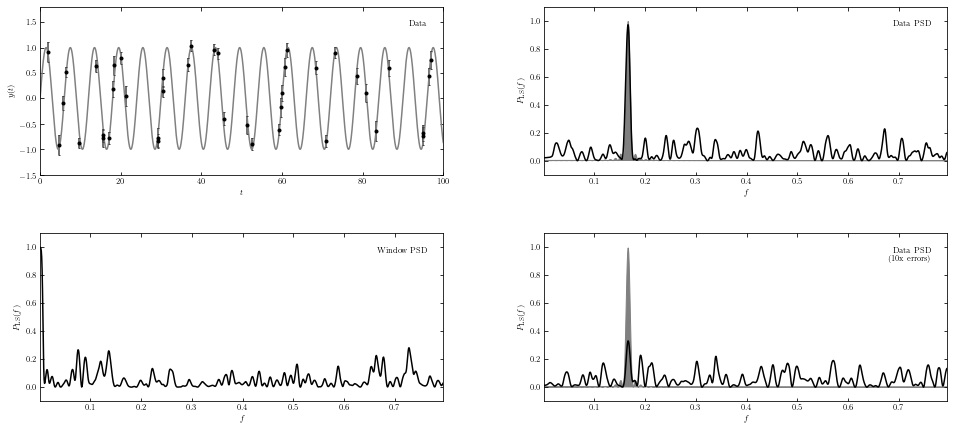

In [19]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from astroML.time_series import lomb_scargle

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
matplotlib.rcParams['axes.xmargin'] = 0

#------------------------------------------------------------
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)

#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
P_window = lomb_scargle(t_obs, y_window, 1, omega,
                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig = plt.figure(figsize=(15, ))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax = fig.add_subplot(221)
ax.plot(t, y, '-', c='gray')
ax.errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax.text(0.96, 0.92, "Data", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-1.5, 1.8)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

ax = fig.add_subplot(223)
ax.plot(omega, P_window, '-', c='black')
ax.text(0.96, 0.92, "Window PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(222)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs1, '-', c='black')
ax.text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(224)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs2, '-', c='black')
ax.text(0.96, 0.92, "Data PSD\n(10x errors)",
        ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()

Above is a figure illustrating the impact of noise on the value of the periodogram's peak. Fake data (top left) is created exactly on a sine function, with noise randomly chosen between 0.1 and 0.2. And, as might be expected, the peak value of the periodogram (top right) is nearly equal to 1.0. One could conclude that these are indeed periodic data. The bottom left figure is the power spectrum of sampling times, showing white noise outside of the Nyquist limit.

However, in the bottom right figure, there is 10 times as much noise. The peak in the periodogram reduces to around 0.26 due to the noise and, even though the signal is exactly periodic, is becomes much harder to find. It can be shown (end of section 10.3.1) that the height of this peak is related to both the AIC and the BIC, so one is safe in interpreting this reduction in the peak value as an absence of evidence for the data's periodicity.

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]


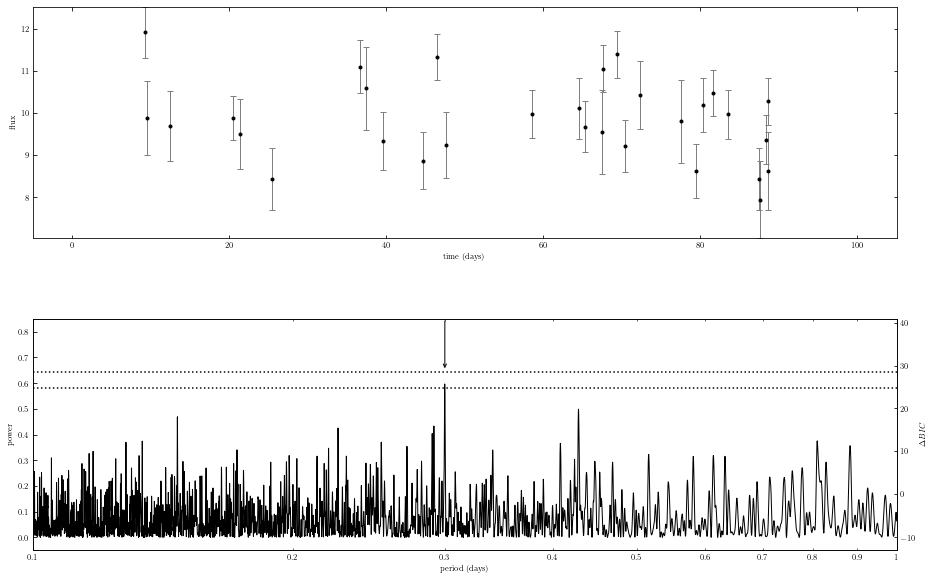

In [22]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)
N = 30
P = 0.3

t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.35)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()

Above is an example of the Lomb-Scargle method at work. Sample data which is observed at uneven times is created by adding a small number to a pure sine whose period is 0.3. Note that in this figure the explicit relationship between the periodogram value and the BIC is on the right. It is greater than 10, so there is significant evidence that the model to choose is not random noise. However, note that there are a variety of peaks to choose from which are also larger than 10.

The dotted lines are the 1% and 5% significance levels, determined by bootstrapping--i.e. by resampling the data 1000 times and creating statistics on the peak value for all of the resamples. 

The simple model presented above can easily be extended to multiple terms in a Fourier sum. One can keep adding terms as long as computation time is available, but it will be shown that the first few terms are sufficient.

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]


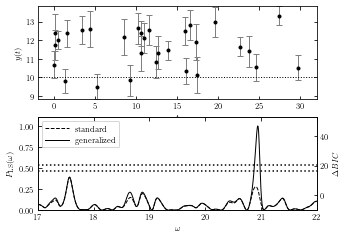

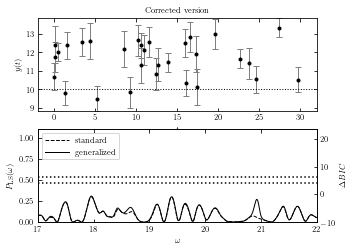

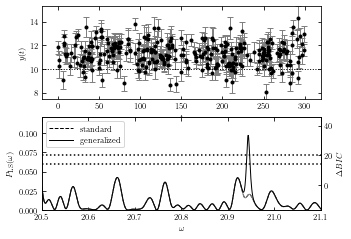

In [23]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import \
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate data where y is positive
np.random.seed(0)
N = 30
P = 0.3

t = P / 2 * np.random.random(N) + P * np.random.randint(100, size=N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = y + np.random.normal(dy)

omega_0 = 2 * np.pi / P

#######################################################################
# Generate the plot with and without the original typo

for typo in [True, False]:
    #------------------------------------------------------------
    # Compute the Lomb-Scargle Periodogram
    sig = np.array([0.1, 0.01, 0.001])
    omega = np.linspace(17, 22, 1000)

    # Notice the typo: we used y rather than y_obs
    if typo is True:
        P_S = lomb_scargle(t, y, dy, omega, generalized=False)
        P_G = lomb_scargle(t, y, dy, omega, generalized=True)
    else:
        P_S = lomb_scargle(t, y_obs, dy, omega, generalized=False)
        P_G = lomb_scargle(t, y_obs, dy, omega, generalized=True)

    #------------------------------------------------------------
    # Get significance via bootstrap
    D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                               N_bootstraps=1000, random_state=0)
    sig1, sig5 = np.percentile(D, [99, 95])

    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(5, 3.75))

    # First panel: input data
    ax = fig.add_subplot(211)
    ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
    ax.plot([-2, 32], [10, 10], ':k', lw=1)

    ax.set_xlim(-2, 32)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y(t)$')

    if typo is False:
        ax.set_title('Corrected version')

    # Second panel: periodogram
    ax = fig.add_subplot(212)
    ax.plot(omega, P_S, '--k', lw=1, label='standard')
    ax.plot(omega, P_G, '-k', lw=1, label='generalized')
    ax.legend(loc=2)

    # plot the significance lines.
    xlim = (omega[0], omega[-1])
    ax.plot(xlim, [sig1, sig1], ':', c='black')
    ax.plot(xlim, [sig5, sig5], ':', c='black')

    # label BIC on the right side
    ax2 = ax.twinx()
    ax2.set_ylim(tuple(lomb_scargle_BIC(ax.get_ylim(), y_obs, dy)))
    ax2.set_ylabel(r'$\Delta BIC$')

    ax.set_xlabel('$\omega$')
    ax.set_ylabel(r'$P_{\rm LS}(\omega)$')
    ax.set_xlim(xlim)
    ax.set_ylim(0, 1.1)


#######################################################################
# Redo the plot without the typo
# We need a larger data range to actually get significant power
# with actual noisy data

#------------------------------------------------------------
# Generate data where y is positive
np.random.seed(0)
N = 300
P = 0.3

t = P / 2 * np.random.random(N) + P * np.random.randint(1000, size=N)
y = 10 + np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = y + np.random.normal(dy)

omega_0 = 2 * np.pi / P


#------------------------------------------------------------
# Compute the Lomb-Scargle Periodogram
sig = np.array([0.1, 0.01, 0.001])
omega = np.linspace(20.5, 21.1, 1000)

P_S = lomb_scargle(t, y_obs, dy, omega, generalized=False)
P_G = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))

# First panel: input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.plot([-20, 320], [10, 10], ':k', lw=1)

ax.set_xlim(-20, 320)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

# Second panel: periodogram
ax = fig.add_subplot(212)
ax.plot(omega, P_S, '--k', lw=1, label='standard')
ax.plot(omega, P_S, '-', c='gray', lw=1)
ax.plot(omega, P_G, '-k', lw=1, label='generalized')
ax.legend(loc=2)

# plot the significance lines.
xlim = (omega[0], omega[-1])
ax.plot(xlim, [sig1, sig1], ':', c='black')
ax.plot(xlim, [sig5, sig5], ':', c='black')

# label BIC on the right side
ax2 = ax.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax.set_xlabel('$\omega$')
ax.set_ylabel(r'$P_{\rm LS}(\omega)$')
ax.set_xlim(xlim)
ax.set_ylim(0, 0.12)

plt.show()

Note that the figure in the book is in error: they passed the non-noisy data to the algorithm, instead of the noisy data. 

In the above is a comparison between a model with multiple modes (solid line) and one with only one mode (grey line). Notice that in the lowermost figre, the single mode method misses the correct peak entirely and identifies the frequency peak at 20.93. The book includes a second figure illustrating this effect--especially when the source is significantly non-sinusoidal and needs to be expanded in multiple modes.

In [36]:
period=2*np.pi/omega[np.where( P_G==np.max(P_G) )]
period

array([0.30001014])

[=========================================]  303.4kb / 303.4kb   
[=========================================]  16.05Mb / 16.05Mb   
@pickle_results: computing results and saving to 'LINEAR_LS.pkl'
 - computing power for 14752041 (253 points)


        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


 - computing power for 1009459 (593 points)
 - computing power for 10022663 (246 points)
 - computing power for 10025796 (233 points)
 - computing power for 11375941 (280 points)
 - computing power for 18525697 (211 points)
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 10.20062676
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277
 - omega_0 = 10.82722772


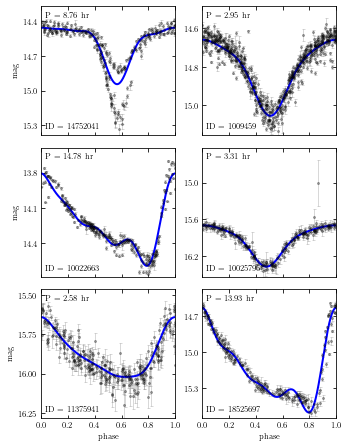

In [46]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
import matplotlib
matplotlib.rc('_internal', classic_mode=True)

#------------------------------------------------------------
# Load the dataset
data = fetch_LINEAR_sample()
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]


#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for {0} ({1} points)".format(i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

#------------------------------------------------------------
# Plot the phased light-curves
fig = plt.figure(figsize=(5, 6.5))
fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

for i in range(6):
    # get the data and best-fit angular frequency
    t, y, dy = data[ids[i]].T
    omega, power = results[ids[i]]
    omega_best = omega[np.argmax(power)]
    print(" - omega_0 = %.10g" % omega_best)

    # do a fit to the first 4 Fourier components
    mtf = MultiTermFit(omega_best, 4)
    mtf.fit(t, y, dy)
    phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

    # plot the phased data and best-fit curves
    ax = fig.add_subplot(321 + i)
    ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                lw=1, ms=4, capsize=1.5, alpha=0.3)
    ax.plot(phase_fit, y_fit, 'b', markeredgecolor='b', lw=2, fillstyle='top', linestyle='solid')

    ax.set_xlim(0, 1)
    ax.set_ylim(plt.ylim()[::-1])
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))

    ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
            transform=ax.transAxes)
    ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
            ha='left', va='top',
            transform=ax.transAxes)

    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

    if i < 4:
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i % 2 == 0:
        ax.set_ylabel('mag')

    if i in (4, 5):
        ax.set_xlabel('phase')

plt.show()

The LINEAR data set is comprised entirely of known periodic variable stars. Above are the results of a Lomb-Scargle period finding search for six randomly chosen sources using the first four modes of a sinusoidal model.

This demonstrates the power of the Lomb-Scargle method IF
- you know the source is a periodic variable ahead of time
- your source is densely observed
- the error in observation is a small fraction of the light obtained
- you already have a good idea what the range of periods will be
- you have sufficient computation time (i.e. 6 instead of 600,000 stars to deal with)
- you don't mind being limited to variable stars which have previously been characterized as periodic and are therefore biased to be among the brighter, nearer stars

Note that the top-left signal is quasi-periodic, with two different peaks being superimposed on each other.

        Use astropy.stats.LombScargle instead. [warnings]


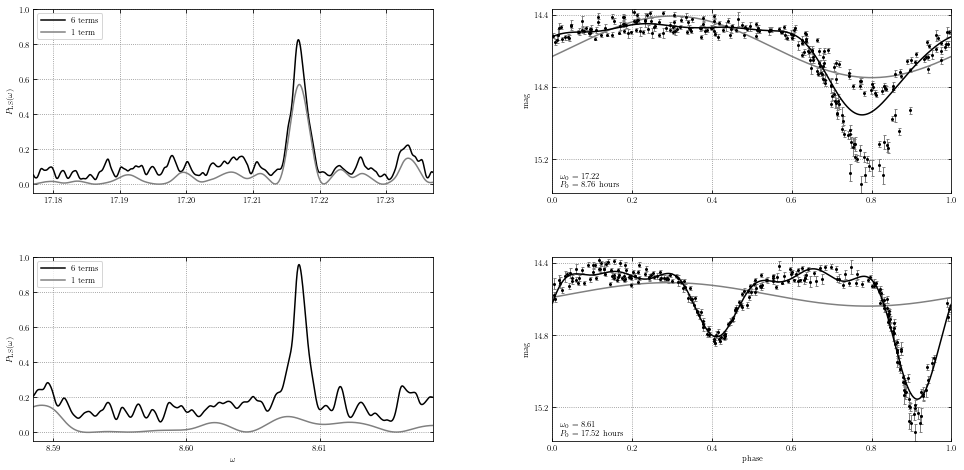

In [50]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

from astroML.time_series import multiterm_periodogram, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
matplotlib.rcParams['axes.xmargin'] = 0

#------------------------------------------------------------
# Get data
data = fetch_LINEAR_sample()
t, y, dy = data[14752041].T

#------------------------------------------------------------
# Do a single-term and multi-term fit around the peak
omega0 = 17.217
nterms_fit = 6

# hack to get better phases: this doesn't change results,
#  except for how the phase plots are displayed
t -= 0.4 * np.pi / omega0

width = 0.03
omega = np.linspace(omega0 - width - 0.01, omega0 + width - 0.01, 1000)

#------------------------------------------------------------
# Compute periodograms and best-fit solutions
#  factor gives the factor that we're dividing the fundamental frequency by
factors = [1, 2]
nterms = [1, 6]

# Compute PSDs for factors & nterms
PSDs = dict()
for f in factors:
    for n in nterms:
        PSDs[(f, n)] = multiterm_periodogram(t, y, dy, omega / f, n)

# Compute the best-fit omega from the 6-term fit
omega_best = dict()
for f in factors:
    omegaf = omega / f
    PSDf = PSDs[(f, 6)]
    omega_best[f] = omegaf[np.argmax(PSDf)]

# Compute the best-fit solution based on the fundamental frequency
best_fit = dict()
for f in factors:
    for n in nterms:
        mtf = MultiTermFit(omega_best[f], n)
        mtf.fit(t, y, dy)
        phase_best, y_best = mtf.predict(1000, adjust_offset=False)

        best_fit[(f, n)] = (phase_best, y_best)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(15, 7.5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.95, hspace=0.35)

for i, f in enumerate(factors):
    P_best = 2 * np.pi / omega_best[f]
    phase_best = (t / P_best) % 1

    # first column: plot the PSD
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.plot(omega / f, PSDs[(f, 6)], '-', c='black', label='6 terms')
    ax1.plot(omega / f, PSDs[(f, 1)], '-', c='gray', label='1 term')
    ax1.grid(color='gray')
    ax1.legend(loc=2)

    ax1.axis('tight')

    ax1.set_ylim(-0.05, 1.001)
    ax1.xaxis.set_major_locator(plt.MultipleLocator(0.01))
    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

    # second column: plot the phased data & fit
    ax2 = fig.add_subplot(222 + 2 * i)
    ax2.errorbar(phase_best, y, dy, fmt='.k', ms=4, ecolor='gray', lw=1,
                 capsize=1.5)
    ax2.plot(best_fit[(f, 1)][0], best_fit[(f, 1)][1], '-', c='gray')
    ax2.plot(best_fit[(f, 6)][0], best_fit[(f, 6)][1], '-', c='black')

    ax2.text(0.02, 0.02, (r"$\omega_0 = %.2f$" % omega_best[f] + "\n"
                          + r"$P_0 = %.2f\ {\rm hours}$" % (24 * P_best)),
             ha='left', va='bottom', transform=ax2.transAxes)

    ax2.grid(color='gray')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(plt.ylim()[::-1])
    ax2.yaxis.set_major_locator(plt.MultipleLocator(0.4))

    # label both axes
    ax1.set_ylabel(r'$P_{\rm LS}(\omega)$')
    ax2.set_ylabel(r'${\rm mag}$')
    if i == 1:
        ax1.set_xlabel(r'$\omega$')
        ax2.set_xlabel(r'${\rm phase}$')

plt.show()

The above figure demonstrates that 6 modes are necessary to accurately portray the periodic behavior of this source. However, the tradeoff with this many modes is that you start to see signs of overfitting (waviness) in the 6-mode fit. This is reflected in the BIC, as shown below.

        Use astropy.stats.LombScargle instead. [warnings]


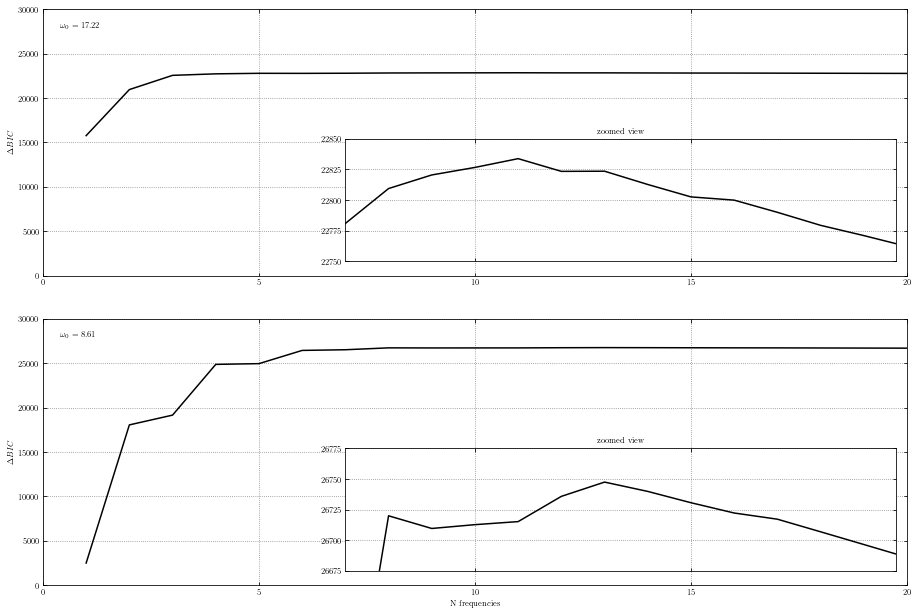

In [48]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import multiterm_periodogram, lomb_scargle_BIC
from astroML.datasets import fetch_LINEAR_sample

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the data
data = fetch_LINEAR_sample()

t, y, dy = data[14752041].T
omega0 = 17.217

# focus only on the region with the peak
omega1 = np.linspace(17.213, 17.220, 100)
omega2 = 0.5 * omega1

#------------------------------------------------------------
# Compute the delta BIC
terms = np.arange(1, 21)
BIC_max = np.zeros((2, len(terms)))

for i, omega in enumerate([omega1, omega2]):
    for j in range(len(terms)):
        P = multiterm_periodogram(t, y, dy, omega, terms[j])
        BIC = lomb_scargle_BIC(P, y, dy, n_harmonics=terms[j])
        BIC_max[i, j] = BIC.max()

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(15, 10))

ax = [fig.add_axes((0.15, 0.53, 0.8, 0.37)),
      fig.add_axes((0.15, 0.1, 0.8, 0.37))]
ax_inset = [fig.add_axes((0.15 + 7 * 0.04, 0.55, 0.79 - 7 * 0.04, 0.17)),
            fig.add_axes((0.15 + 7 * 0.04, 0.12, 0.79 - 7 * 0.04, 0.17))]
ylims = [(22750, 22850),
         (26675, 26775)]
omega0 = [17.22, 8.61]

for i in range(2):
    # Plot full panel
    ax[i].plot(terms, BIC_max[i], '-k')
    ax[i].set_xlim(0, 20)
    ax[i].set_ylim(0, 30000)
    ax[i].text(0.02, 0.95, r"$\omega_0 = %.2f$" % omega0[i],
               ha='left', va='top', transform=ax[i].transAxes)

    ax[i].set_ylabel(r'$\Delta BIC$')
    if i == 1:
        ax[i].set_xlabel('N frequencies')
    ax[i].grid(color='gray')

    # plot inset
    ax_inset[i].plot(terms, BIC_max[i], '-k')
    ax_inset[i].xaxis.set_major_locator(plt.MultipleLocator(5))
    ax_inset[i].xaxis.set_major_formatter(plt.NullFormatter())
    ax_inset[i].yaxis.set_major_locator(plt.MultipleLocator(25))
    ax_inset[i].yaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
    ax_inset[i].set_xlim(7, 19.75)
    ax_inset[i].set_ylim(ylims[i])
    ax_inset[i].set_title('zoomed view')
    ax_inset[i].grid(color='gray')

plt.show()

Above is a demonstration that a multimodal expansion should probably terminate before the 5th mode. The top-left LINEAR signal is expanded to the number of modes on the x axis. The change in BIC of the multimode expansion, vs. random noise, is plotted on the y axis. 

The plot shows that the BIC peaks around 10 to 15 terms, which is where we find clear overfitting. Overfitting is likey to be indicated on the other five sources analyzed above much sooner.

We have now completed steps 1 and 2 of classification.

The period of each source is now known, and will be an important indicator for these data. 

Additionally, we have performed a dimensional reduction via Fourier expansion. The amplitudes

$$A_m = (a_m^2 + b_m^2)^\frac{1}{2}$$

also form an important indicator for characterizing the shape of the light curve.

We can now, for example, perform unsupervised clustering and classification of these sources.

@pickle_results: using precomputed results from 'LINEAR_clustering.pkl'
number of components: 12
\begin{tabular}{|l|lllllll|}
   \hline
   & $u-g$    & $g-i$    & $i-K$    & $J-K$    & $\log(P)$    & amplitude    & skew \\
   \hline
   1   & $1.16 \pm 0.08$   & $0.31 \pm 0.04$   & $1.16 \pm 0.18$   & $0.29 \pm 0.16$   & $-0.24 \pm 0.05$   & $0.68 \pm 0.18$   & $-0.26 \pm 0.96$  \\
   2   & $1.18 \pm 0.11$   & $0.00 \pm 0.12$   & $0.93 \pm 0.35$   & $0.24 \pm 0.16$   & $-0.48 \pm 0.05$   & $0.43 \pm 0.10$   & $0.34 \pm 1.05$  \\
   3   & $1.64 \pm 0.26$   & $0.91 \pm 0.15$   & $1.66 \pm 0.31$   & $0.56 \pm 0.10$   & $-0.57 \pm 0.04$   & $0.53 \pm 0.15$   & $0.91 \pm 1.11$  \\
   4   & $1.17 \pm 0.08$   & $0.12 \pm 0.12$   & $0.98 \pm 0.23$   & $0.30 \pm 0.16$   & $-0.23 \pm 0.06$   & $0.66 \pm 0.19$   & $-0.11 \pm 1.09$  \\
   5   & $1.21 \pm 0.23$   & $0.54 \pm 0.12$   & $1.31 \pm 0.30$   & $0.40 \pm 0.11$   & $-0.48 \pm 0.05$   & $0.46 \pm 0.13$   & $0.77 \pm 0.92$  \\
   6   & $1.21 

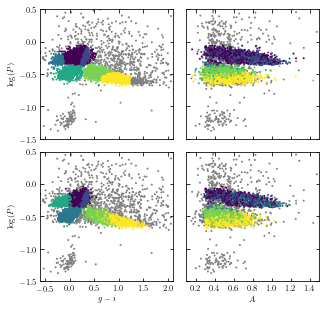

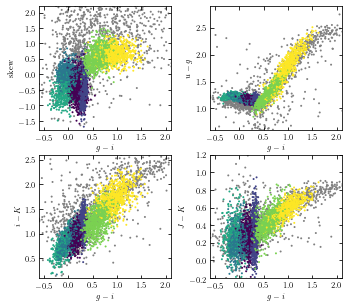

In [55]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from sklearn.mixture import GaussianMixture

from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_LINEAR_geneva

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get the Geneva periods data
data = fetch_LINEAR_geneva()

#----------------------------------------------------------------------
# compute Gaussian Mixture models

filetemplate = 'gmm_res_%i_%i.pkl'
attributes = [('gi', 'logP'),
              ('ug', 'gi', 'iK', 'JK', 'logP', 'Ampl', 'skew')]
components = np.arange(1, 21)

#------------------------------------------------------------
# Create attribute arrays
Xarrays = []
for attr in attributes:
    Xarrays.append(np.vstack([data[a] for a in attr]).T)


#------------------------------------------------------------
# Compute the results (and save to pickle file)
@pickle_results('LINEAR_clustering.pkl')
def compute_GaussianMixture_results(components, attributes):
    clfs = []

    for attr, X in zip(attributes, Xarrays):
        clfs_i = []

        for comp in components:
            print("  - {0} component fit".format(comp))
            clf = GaussianMixture(comp, covariance_type='full',
                      random_state=0, max_iter=500)
            clf.fit(X)
            clfs_i.append(clf)

            if not clf.converged_:
                print("           NOT CONVERGED!")

        clfs.append(clfs_i)
    return clfs


clfs = compute_GaussianMixture_results(components, attributes)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

class_labels = []

for i in range(2):
    # Grab the best classifier, based on the BIC
    X = Xarrays[i]
    BIC = [c.bic(X) for c in clfs[i]]
    i_best = np.argmin(BIC)

    print("number of components:", components[i_best])

    clf = clfs[i][i_best]
    n_components = clf.n_components

    # Predict the cluster labels with the classifier
    c = clf.predict(X)
    classes = np.unique(c)

    class_labels.append(c)

    # sort the cluster by normalized density of points
    counts = np.sum(c == classes[:, None], 1)
    size = np.array([np.linalg.det(C) for C in clf.covariances_])
    weights = clf.weights_
    density = counts / size

    # Clusters with very few points are less interesting:
    # set their density to zero so they'll go to the end of the list
    density[counts < 5] = 0
    isort = np.argsort(density)[::-1]

    # find statistics of the top 10 clusters
    Nclusters = 6

    means = []
    stdevs = []
    counts = []

    names = [name for name in data.dtype.names[2:] if name != 'LINEARobjectID']
    labels = ['$u-g$', '$g-i$', '$i-K$', '$J-K$',
              r'$\log(P)$', 'amplitude', 'skew',
              'kurtosis', 'median mag', r'$N_{\rm obs}$', 'Visual Class']

    assert len(names) == len(labels)

    i_logP = names.index('logP')

    for j in range(Nclusters):
        flag = (c == isort[j])
        counts.append(np.sum(flag))
        means.append([np.mean(data[n][flag]) for n in names])
        stdevs.append([data[n][flag].std() for n in names])

    counts = np.array(counts)
    means = np.array(means)
    stdevs = np.array(stdevs)

    # define colors based on median of logP
    j_ordered = np.argsort(-means[:, i_logP])

    # tweak colors by hand
    if i == 1:
        j_ordered[3], j_ordered[2] = j_ordered[2], j_ordered[3]

    color = np.zeros(c.shape)
    for j in range(Nclusters):
        flag = (c == isort[j_ordered[j]])
        color[flag] = j + 1

    # separate into foureground and background
    back = (color == 0)
    fore = ~back

    # Plot the resulting clusters
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.scatter(data['gi'][back], data['logP'][back],
                c='gray', edgecolors='none', s=4, linewidths=0)
    ax1.scatter(data['gi'][fore], data['logP'][fore],
                c=color[fore], edgecolors='none',  s=4, linewidths=0)

    ax1.set_ylabel(r'$\log(P)$')

    ax2 = plt.subplot(222 + 2 * i)
    ax2.scatter(data['Ampl'][back], data['logP'][back],
                c='gray', edgecolors='none', s=4, linewidths=0)
    ax2.scatter(data['Ampl'][fore], data['logP'][fore],
                c=color[fore], edgecolors='none', s=4, linewidths=0)

    #------------------------------
    # set axis limits
    ax1.set_xlim(-0.6, 2.1)
    ax2.set_xlim(0.1, 1.5)
    ax1.set_ylim(-1.5, 0.5)
    ax2.set_ylim(-1.5, 0.5)

    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    if i == 0:
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_xlabel(r'$g-i$')
        ax2.set_xlabel(r'$A$')


    #------------------------------
    # print table of means and medians directly to LaTeX format
    print(r"\begin{tabular}{|l|lllllll|}")
    print(r"   \hline")
    for j in range(7):
        print('   &', labels[j], end=" ")
    print(r"\\")
    print(r"   \hline")

    for j in range(Nclusters):
        print("   {0} ".format(j + 1), end=' ')
        for k in range(7):
            print(" & $%.2f \pm %.2f$ " % (means[j, k], stdevs[j, k]), end=' ')
        print(r"\\")

    print(r"\hline")
    print(r"\end{tabular}")

#------------------------------------------------------------
# Second figure
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.3)

attrs = ['skew', 'ug', 'iK', 'JK']
labels = ['skew', '$u-g$', '$i-K$', '$J-K$']
ylims = [(-1.8, 2.2), (0.6, 2.9), (0.1, 2.6), (-0.2, 1.2)]

for i in range(4):
    ax = fig.add_subplot(221 + i)
    ax.scatter(data['gi'][back], data[attrs[i]][back],
               c='gray', edgecolors='none', s=4, linewidths=0)
    ax.scatter(data['gi'][fore], data[attrs[i]][fore],
               c=color[fore], edgecolors='none', s=4, linewidths=0)
    ax.set_xlabel('$g-i$')
    ax.set_ylabel(labels[i])

    ax.set_xlim(-0.6, 2.1)
    ax.set_ylim(ylims[i])

#------------------------------------------------------------
# Save the results
#
# run the script as
#
#   >$ python fig_LINEAR_clustering.py --save
#
# to output the data file showing the cluster labels of each point
import sys
if len(sys.argv) > 1 and sys.argv[1] == '--save':
    filename = 'cluster_labels.dat'

    print("Saving cluster labels to", filename)

    from astroML.datasets.LINEAR_sample import ARCHIVE_DTYPE
    new_data = np.zeros(len(data),
                        dtype=(ARCHIVE_DTYPE + [('2D_cluster_ID', 'i4'),
                                                ('7D_cluster_ID', 'i4')]))

    for name in data.dtype.names:
        new_data[name] = data[name]
    new_data['2D_cluster_ID'] = class_labels[0]
    new_data['7D_cluster_ID'] = class_labels[1]

    fmt = ('%.6f   %.6f   %.3f   %.3f   %.3f   %.3f   %.7f   %.3f   %.3f   '
           '%.3f    %.2f     %i     %i      %s          %i              %i\n')


    F = open(filename, 'w')
    F.write('#    ra           dec       ug      gi      iK      JK     '
            'logP       Ampl    skew      kurt    magMed    nObs  LCtype  '
            'LINEARobjectID  2D_cluster_ID   7D_cluster_ID\n')
    for line in new_data:
        F.write(fmt % tuple(line[col] for col in line.dtype.names))
    F.close()

plt.show()

The above code from astroML contains an error: all references to the 'amp' field must be changed to 'Ampl'.

The above clustering does not do an excellent job at finding all of the potential star types, with an entire class (RR Lyrae?) appearing as an outlier on the bottom-left.

/usr/local/lib64/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


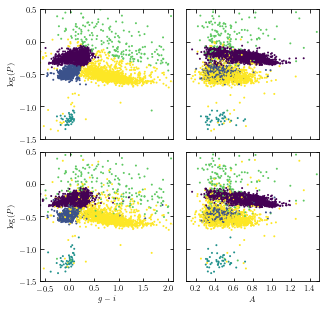

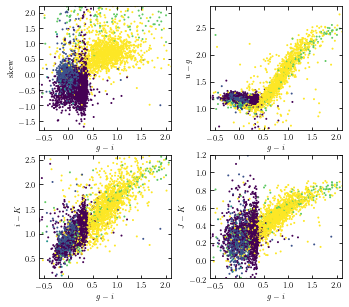

In [58]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from astroML.classification import GMMBayes
from sklearn.model_selection import train_test_split
from astroML.datasets import fetch_LINEAR_geneva

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

data = fetch_LINEAR_geneva()

attributes = [('gi', 'logP'),
              ('gi', 'logP', 'ug', 'iK', 'JK', 'Ampl', 'skew')]
labels = ['$u-g$', '$g-i$', '$i-K$', '$J-K$',
          r'$\log(P)$', 'amplitude', 'skew']
cls = 'LCtype'
Ntrain = 3000

#------------------------------------------------------------
# Create attribute arrays
X = []
y = []

for attr in attributes:
    X.append(np.vstack([data[a] for a in attr]).T)
    LCtype = data[cls].copy()

    # there is no #3.  For a better color scheme in plots,
    # we'll set 6->3
    LCtype[LCtype == 6] = 3
    y.append(LCtype)


#@pickle_results('LINEAR_GMMBayes.pkl')
def compute_SVM_results(i_train, i_test, n_components=5):
    classifiers = []
    predictions = []
    Xtests = []
    ytests = []
    Xtrains = []
    ytrains = []

    for i in range(len(attributes)):
        Xtrain = X[i][i_train]
        Xtest = X[i][i_test]
        ytrain = y[i][i_train]
        ytest = y[i][i_test]

        clf = GMMBayes(n_components, tol=1E-5, covariance_type='full',
                       random_state=0)
        clf.fit(Xtrain, ytrain)
        y_pred = clf.predict(Xtest)

        classifiers.append(clf)
        predictions.append(y_pred)

    return classifiers, predictions


i = np.arange(len(data))
i_train, i_test = train_test_split(i, random_state=0, train_size=2000)
clfs, ypred = compute_SVM_results(i_train, i_test)


#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

class_labels = []

for i in range(2):
    Xtest = X[i][i_test]
    ytest = y[i][i_test]
    amp = data['Ampl'][i_test]

    # Plot the resulting classifications
    ax1 = fig.add_subplot(221 + 2 * i)
    ax1.scatter(Xtest[:, 0], Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, linewidths=0)

    ax1.set_ylabel(r'$\log(P)$')

    ax2 = plt.subplot(222 + 2 * i)
    ax2.scatter(amp, Xtest[:, 1],
                c=ypred[i], edgecolors='none', s=4, lw=0)

    #------------------------------
    # set axis limits
    ax1.set_xlim(-0.6, 2.1)
    ax2.set_xlim(0.1, 1.5)
    ax1.set_ylim(-1.5, 0.5)
    ax2.set_ylim(-1.5, 0.5)

    ax2.yaxis.set_major_formatter(plt.NullFormatter())
    if i == 0:
        ax1.xaxis.set_major_formatter(plt.NullFormatter())
        ax2.xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax1.set_xlabel(r'$g-i$')
        ax2.set_xlabel(r'$A$')

#------------------------------------------------------------
# Second figure
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.3)

attrs = ['skew', 'ug', 'iK', 'JK']
labels = ['skew', '$u-g$', '$i-K$', '$J-K$']
ylims = [(-1.8, 2.2), (0.6, 2.9), (0.1, 2.6), (-0.2, 1.2)]

for i in range(4):
    ax = fig.add_subplot(221 + i)
    ax.scatter(data['gi'][i_test], data[attrs[i]][i_test],
               c=ypred[1], edgecolors='none', s=4, lw=0)
    ax.set_xlabel('$g-i$')
    ax.set_ylabel(labels[i])

    ax.set_xlim(-0.6, 2.1)
    ax.set_ylim(ylims[i])

#------------------------------------------------------------
# Save the results
#
# run the script as
#
#   >$ python fig_LINEAR_clustering.py --save
#
# to output the data file showing the cluster labels of each point
import sys
if len(sys.argv) > 1 and sys.argv[1] == '--save':
    filename = 'cluster_labels_gmm.dat'

    print("Saving cluster labels to", filename)

    from astroML.datasets.LINEAR_sample import ARCHIVE_DTYPE
    new_data = np.zeros(len(data),
                        dtype=(ARCHIVE_DTYPE + [('2D_cluster_ID', 'i4'),
                                                ('7D_cluster_ID', 'i4')]))

    # switch the labels back 3->6
    for i in range(2):
        ypred[i][ypred[i] == 3] = 6

    # need to put labels back in order
    class_labels = [-999 * np.ones(len(data)) for i in range(2)]
    for i in range(2):
        class_labels[i][i_test] = ypred[i]

    for name in data.dtype.names:
        new_data[name] = data[name]
    new_data['2D_cluster_ID'] = class_labels[0]
    new_data['7D_cluster_ID'] = class_labels[1]

    fmt = ('%.6f   %.6f   %.3f   %.3f   %.3f   %.3f   %.7f   %.3f   %.3f   '
           '%.3f    %.2f     %i     %i      %s          %i              %i\n')


    F = open(filename, 'w')
    F.write('#    ra           dec       ug      gi      iK      JK     '
            'logP       Ampl    skew      kurt    magMed    nObs  LCtype  '
            'LINEARobjectID  2D_cluster_ID   7D_cluster_ID\n')
    for line in new_data:
        F.write(fmt % tuple(line[col] for col in line.dtype.names))
    F.close()

plt.show()

# Classification of star types in the LINEAR data set.

Note that:
- the log period of these stars varies between -1.5 and 0.5. It may be implied that this catalog does not include Mira or cepheid variables, which vary on periods of up to 1000 days. I suspect this is because the Lomb-Scargle method does not work well/quickly when it is searching on a period domain between 0.001<T<1000.

<img src="fullzoo.png" style="width: 400px;">

- the classification does not make use of the shape of the light curve implied by the expansion coefficients! I.e. the values of the coefficients, which would help with class separation, do not appear. That is because the above classification does not download the light observations in their raw form & perform the Lomb-Scargle technique; instead, it downloads the star's metadata and its previously acquired period. It probably does this because the Lomb-Scargle method applied to these ~7000 stars would take a little less than a day on a 6-core 10th generation intel. Applied to the 2 million stars in the LSST test set, the method would take something on the order of 6 months. Not impossible, but is there a better way?


# Lomb-Scargle Method on LSST-like observations


In [67]:
import os
import urllib
from urllib.request import urlopen
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

import pymc3

from astroML.plotting.mcmc import plot_mcmc
from astroML.decorators import pickle_results
from astroML.plotting import setup_text_plots
import tarfile

from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

from astroML.plotting import setup_text_plots

from collections import OrderedDict
import scipy.stats as spstat
from astropy.table import Table

from gatspy.periodic import LombScargleMultiband


In [62]:
#define a structure to hold light curves, with methods for plotting them and returning potentially important features.
#You'd want to modify this to return the features ranked as important from the Avocado algorithm.
class LightCurve(object):
    '''Light curve object for PLAsTiCC formatted data'''
    
    _passbands = OrderedDict([(0,'C4'),\
                              (1,'C2'),\
                              (2,'C3'),\
                              (3,'C1'),\
                              (4,'k'),\
                              (5,'C5')])
    
    _pbnames = ['u','g','r','i','z','y']
    
    def __init__(self, filename):
        '''Read in light curve data'''

        self.DFlc     = Table.read(filename, format='ascii.csv')
        self.filename = filename.replace('.csv','')
        self._finalize()
     
    # this is some simple code to demonstrate how to calculate features on these multiband light curves
    # we're not suggesting using these features specifically
    # there also might be additional pre-processing you do before computing anything
    # it's purely for illustration
    def _finalize(self):
        '''Store individual passband fluxes as object attributes'''
        # in this example, we'll use the weighted mean to normalize the features
        weighted_mean = lambda flux, dflux: np.sum(flux*(flux/dflux)**2)/np.sum((flux/dflux)**2)
        
        # define some functions to compute simple descriptive statistics
        normalized_flux_std = lambda flux, wMeanFlux: np.std(flux/wMeanFlux, ddof = 1)
        normalized_amplitude = lambda flux, wMeanFlux: (np.max(flux) - np.min(flux))/wMeanFlux
        normalized_MAD = lambda flux, wMeanFlux: np.median(np.abs((flux - np.median(flux))/wMeanFlux))
        beyond_1std = lambda flux, wMeanFlux: sum(np.abs(flux - wMeanFlux) > np.std(flux, ddof = 1))/len(flux)
        
        for pb in self._passbands:
            ind = self.DFlc['passband'] == pb
            pbname = self._pbnames[pb]
            
            if len(self.DFlc[ind]) == 0:
                setattr(self, f'{pbname}Std', np.nan)
                setattr(self, f'{pbname}Amp', np.nan)
                setattr(self, f'{pbname}MAD', np.nan)
                setattr(self, f'{pbname}Beyond', np.nan)
                setattr(self, f'{pbname}Skew', np.nan)
                continue
            
            f  = self.DFlc['flux'][ind]
            df = self.DFlc['flux_err'][ind]
            m  = weighted_mean(f, df)
            
            # we'll save the measurements in each passband to simplify access.
            setattr(self, f'{pbname}Flux', f)
            setattr(self, f'{pbname}FluxUnc', df)
            setattr(self, f'{pbname}Mean', m)
            
            # compute the features
            std = normalized_flux_std(f, df)
            amp = normalized_amplitude(f, m)
            mad = normalized_MAD(f, m)
            beyond = beyond_1std(f, m)
            skew = spstat.skew(f) 
            
            # and save the features
            setattr(self, f'{pbname}Std', std)
            setattr(self, f'{pbname}Amp', amp)
            setattr(self, f'{pbname}MAD', mad)
            setattr(self, f'{pbname}Beyond', beyond)
            setattr(self, f'{pbname}Skew', skew)
        
        # we can also construct features between passbands
        pbs = list(self._passbands.keys())
        for i, lpb in enumerate(pbs[0:-1]):
            rpb = pbs[i+1]
            
            lpbname = self._pbnames[lpb]
            rpbname = self._pbnames[rpb]
            
            colname = '{}Minus{}'.format(lpbname, rpbname.upper())
            lMean = getattr(self, f'{lpbname}Mean', np.nan)
            rMean = getattr(self, f'{rpbname}Mean', np.nan)
            col = -2.5*np.log10(lMean/rMean) if lMean> 0 and rMean > 0 else -999
            setattr(self, colname, col)
    
    # this is a simple routine to visualize a light curve
    # it can plot vs the MJD array of the light curve
    # or vs an optional `phase` array that you pass 
    def plot_multicolor_lc(self, phase=None):
        '''Plot the multiband light curve'''

        fig, ax = plt.subplots(figsize=(8,6))

        
        if phase is None:
            phase = []
        if len(phase) != len(self.DFlc):
            phase = self.DFlc['mjd']
            xlabel = 'MJD'
        else:
            xlabel = 'Phase'
            
        for i, pb in enumerate(self._passbands):
            pbname = self._pbnames[pb]
            ind = self.DFlc['passband'] == pb
            if len(self.DFlc[ind]) == 0:
                continue
            ax.errorbar(phase[ind], 
                     self.DFlc['flux'][ind],
                     self.DFlc['flux_err'][ind],
                     fmt = 'o', color = self._passbands[pb], label = f'{pbname}')
        ax.legend(ncol = 4, frameon = True)
        ax.set_xlabel(f'{xlabel}', fontsize='large')
        ax.set_ylabel('Flux', fontsize='large')
        fig.suptitle(self.filename, fontsize='x-large')
        fig.tight_layout(rect=[0, 0, 1, 0.97])
    
    def get_features(self):
        '''Return all the features for this object'''
        variables = ['Std', 'Amp', 'MAD', 'Beyond', 'Skew']
        feats = []
        for i, pb in enumerate(self._passbands):
            pbname = self._pbnames[pb]
            feats += [getattr(self, f'{pbname}{x}', np.nan) for x in variables]
        return feats

In [101]:
#I've previously downloaded the training set and saved each separately as a csv file.
#Define the lightcurve structure for a particular star #615
lc=LightCurve('615.csv')

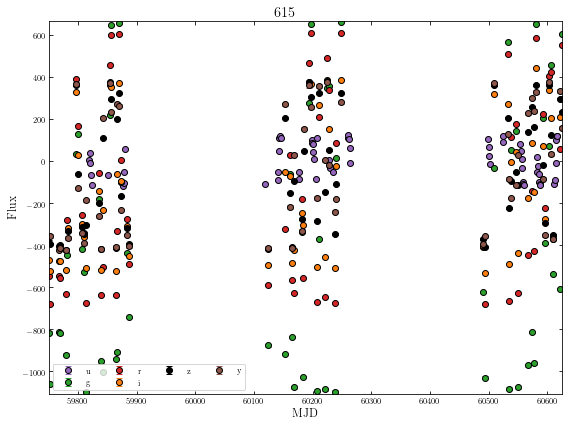

In [102]:
lc.plot_multicolor_lc()

In [103]:
model = LombScargleMultiband(fit_period=True)

# we'll window the search range by setting minimums and maximums here
# but in general, the search range you want to evaluate will depend on the data
# and you will not be able to window like this unless you know something about
# the class of the object a priori
t_min = max(np.median(np.diff(sorted(lc.DFlc['mjd']))), 0.1)
t_max = min(10., (lc.DFlc['mjd'].max() - lc.DFlc['mjd'].min())/2.)

model.optimizer.set(period_range=(t_min, t_max), first_pass_coverage=5)
model.fit(lc.DFlc['mjd'], lc.DFlc['flux'], dy=lc.DFlc['flux_err'], filts=lc.DFlc['passband'])
period = model.best_period
print(f'{lc.filename} has a period of {period} days')

Finding optimal frequency:
 - Estimated peak width = 0.00719
 - Using 5 steps per peak; omega_step = 0.00144
 - User-specified period range:  0.1 to 10
 - Computing periods at 43254 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
615 has a period of 0.3244994176047133 days


In [104]:
t, y, dy, filts = [lc.DFlc['mjd'], lc.DFlc['flux'], lc.DFlc['flux_err'], lc.DFlc['passband']]

Finding optimal frequency:
 - Estimated peak width = 0.00719
 - Using 5 steps per peak; omega_step = 0.00144
 - User-specified period range:  0.1 to 10
 - Computing periods at 43254 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


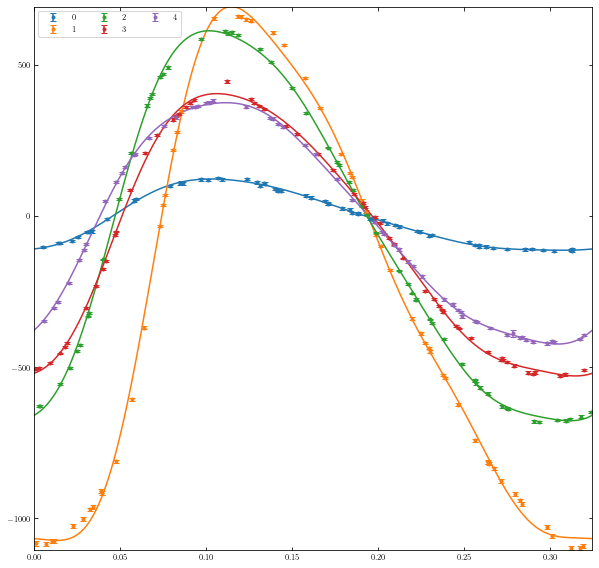

In [105]:
def plot_model(model, lc):
    t, y, dy, filts = [lc.DFlc['mjd'], lc.DFlc['flux'], lc.DFlc['flux_err'], lc.DFlc['passband']]

    t_min = max(np.median(np.diff(sorted(lc.DFlc['mjd']))), 0.1)
    t_max = min(10., (lc.DFlc['mjd'].max() - lc.DFlc['mjd'].min())/2.)

    model.optimizer.set(period_range=(t_min, t_max), first_pass_coverage=5)
    model.fit(t, y, dy, filts)
    period = model.best_period
    
    tfit = np.linspace(0, period, 1000)
    myfilt=[0,1,2,3,4]
    for filt in myfilt:
        mask = (filts == filt)
        eb = plt.errorbar(t[mask] % period, y[mask], dy[mask], fmt='.', label=filt)
        yfit = model.predict(tfit, filt, period=period)
        plt.plot(tfit, yfit, color=eb[0].get_color())
    #plt.gca().invert_yaxis()
    plt.legend(ncol=3, loc='upper left')
    
fig = plt.figure(figsize=(10,10))
plot_model(LombScargleMultiband(Nterms_base=4, Nterms_band=4, fit_period=True), lc)

Quiz: Which one is this?

<img src="popscivariable.png">

Works great! The exponential decay pretty clearly defines this star as an RR Lyrae. But, it takes nearly a minute to compute. It only works when I can specify the period within a factor of ten or so. Oh, and note that the flux is upside-down.

In [106]:
#Demonstrating analysis flow once structures and functions are defined
lc=LightCurve('44480.csv')

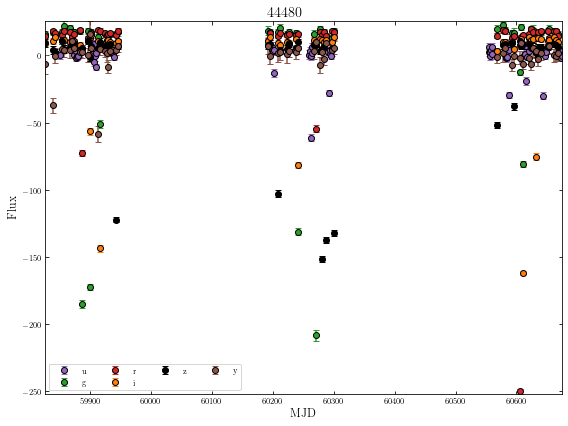

In [108]:
lc.plot_multicolor_lc()

In [107]:
t_min = max(np.median(np.diff(sorted(lc.DFlc['mjd']))), 0.1)
t_max = min(1., (lc.DFlc['mjd'].max() - lc.DFlc['mjd'].min())/2.)
model.optimizer.set(period_range=(t_min, t_max), first_pass_coverage=5)
model.fit(lc.DFlc['mjd'], lc.DFlc['flux'], dy=lc.DFlc['flux_err'], filts=lc.DFlc['passband'])
period = model.best_period

Finding optimal frequency:
 - Estimated peak width = 0.0074
 - Using 5 steps per peak; omega_step = 0.00148
 - User-specified period range:  0.1 to 1
 - Computing periods at 38198 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


In [109]:
period

0.17145173776464998

Finding optimal frequency:
 - Estimated peak width = 0.0074
 - Using 5 steps per peak; omega_step = 0.00148
 - User-specified period range:  0.1 to 10
 - Computing periods at 42018 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


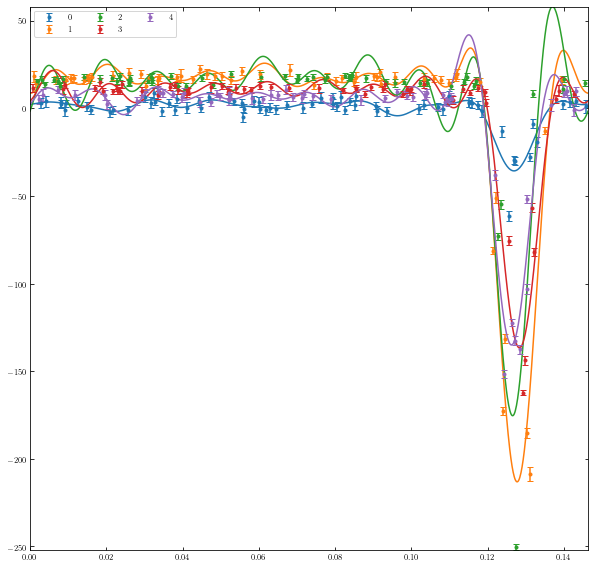

In [110]:
fig = plt.figure(figsize=(10,10))
plot_model(LombScargleMultiband(Nterms_base=10, Nterms_band=10, fit_period=True), lc)

Again the plots are upside-down, so in reality this is a roughly constant emission followed by a steep blink of dimmed light. That's characteristic of an eclipsing binary or algol star.

As the text suggests, light curves that deviate significantly from a sinusoid require more terms--here, ten of them. (You need more and more terms to approximate a function that's more and more delta-function-like). That increases computation time to around ten minutes.


# Lessons from the PLASTICC competition

It was seen above that only the metadata (color, amplitude, skew, etc), together with the period of variability, was sufficient to distinguish between the RR Lyrae ab, RRc, and a few eclipsing binary variables stars. That is to say, the shape of the light curve is not needed to perform classification.

Is it the case that metadata alone is sufficient to distinguish between them? Yes!

<img src="importance.png" style="width: 500px;">

In the confusion matrix below it may be seen that the above metadata indicators are sufficient to classify periodic variables correctly more than 97% of the time. It appears that many of the mis-classified objects are mistaken for microlensing events. By far the most difficult part of the classification lies in distinguishing between the non-periodic parts of the survey.

<img src="confusionmatrix.png" style="width: 400px;">

IMHO, seeing this, I actually think it'd be worth giving regression/classification a try at guessing a star's period. You could then pass the guessed class and period to the Lomb-Scargle algorithm with a very narrow range of periods, in which case it should work admirably. It just doesn't appear to be useful for classification when surveys start to include millions of stars.

# Conclusion

The Lomb-Scargle method works, but is neither practical nor necessary for the classification of periodic stars.

In fact, you probably want to do classification first and pass a guessed value of the period to the Lomb-Scargle algorithm.

I am interested in the application of this method to extract periodicity from people's behavior. One could imagine an algorithm that attempts to place non-periodic outliers in a separate population and marginalize over them via methods found in the text. Animal behaviors, when people buy things, hidden periods in the yearly stock exchange, etc.


In [111]:
import dill

dill.dump_session('notebook_session.db')